In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
from collections import Counter


Text(0.5,1,'Original')

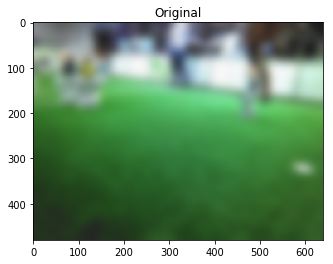

In [2]:
img = cv2.imread("testField1.png")
blur =cv2.GaussianBlur(img,(101,101),10)
plt.imshow(blur)
plt.title('Original')
# plt.show(blur)

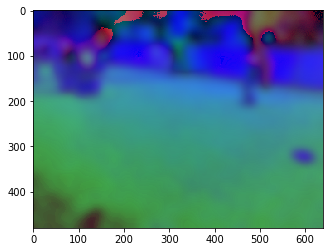

In [3]:
hsv =  cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
# laplacian = cv2.Laplacian(grey,cv2.CV_64F)
# plt.imshow(laplacian)
# plt.title('Original')
# print(laplacian)

In [24]:
def findgreen(image):
    thres = 50
    # find sample methods
    ys = np.random.choice(np.linspace(200,479,278),100)
    xs = np.random.choice(np.linspace(0,600,601),100)
    print(ys[1],xs[1])
    i=4
    print(image[int(ys[i]),int(xs[i])])
    values = [image[int(ys[i]),int(xs[i])] for i in range(100)]
    countVal = Counter(values)
    modus = countVal.most_common(1)[0][0]
    print(modus)
    # optie om via arrays sneller te maken
    minmod = np.array(np.array(modus) - thres)
    maxmod = np.array(np.array(modus) + thres)
    
#     return image[image<maxmod and image>minmod]
    nimage = image[:].copy()
    
    # Via opencv
    nimage = cv2.inRange(image,minmod,maxmod)
    
    return nimage

In [25]:
from sklearn import linear_model, datasets

17
397.41516245487367 418.0
151
156


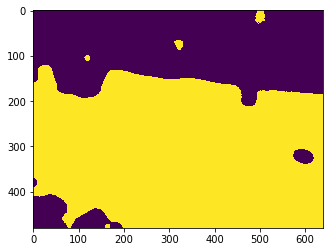

In [26]:
h,s,v = cv2.split(hsv)
edge = cv2.Canny(s, 10,30)
ransac = linear_model.RANSACRegressor()
x,y = np.argwhere(edge == 255)[:,0], np.argwhere(edge == 255)[:,1]

# ransac.fit(x, y)
# inlier_mask = ransac.inlier_mask
# print(inlier_mask)
print(s[5,5])
new = findgreen(np.array(s))
plt.imshow(new)

In [ ]:
# print(np.random.choice(np.linspace(0,600,601),5))
greenSel = findgreen(hsv)
plt.imshow(greenSel)
# print(np.shape(greenSel))

In [ ]:
res = cv2.bitwise_and(img,img,mask = greenSel)
plt.imshow(res)

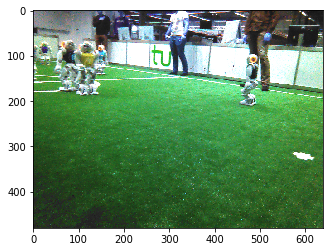

In [27]:
plt.imshow(img)

In [ ]:
leon = np.array([3,4,5,6])
print((leon < 4) & (leon > 9))

In [ ]:
# laplacian = cv2.Laplacian(grey,cv2.CV_64F)
# plt.imshow(laplacian)

 # Crap i dont want to throw away cuz im insecure

In [ ]:
    
    
    
    
    # Via Split:
#     b,g,r = cv2.split(nimage)
#     newcols = []
#     for idx, color in enumerate([b,g,r]):
#         newcol = []
#         minthresh = minmod[idx]
#         maxthresh = maxmod[idx]
#         for column in color:
#             column = np.array(column)
#             newcol.append((column<maxthresh) & (column > minthresh))
#         newcols.append(newcol)
#     print(newcols[0])
#     nimage = cv2.merge((newcols[0],newcols[1],newcols[2]))
        

    
#     im_bw = cv2.threshold(image, thres, 255, cv2.THRESH_BINARY)[1]
#     for y,yval in enumerate(image):
#         for x in range(len(yval)):
#             rgb = image[y, x]
# #             print(rgb)
#             if rgb[0] < modus[0]-thres or rgb[0] > modus[0]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             elif rgb[1] < modus[1]-thres or rgb[1] > modus[1]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             elif rgb[0] < modus[2]-thres or rgb[2] > modus[2]+thres:
#                 nimage[y, x] = [0, 0, 0]
#             else:
#                 nimage[y, x] = [255, 255, 255]